# Assignment - Dataset



##  目的

在本次作業中，學員將練習使用Cambrian Dataset SDK上傳/下載Cambrian Dataset，<br>
並透過Python的h5py模組訪問Cambrian Dataset，了解如何使用Cambrian Dataset

## 評分標準

1. 完成資料集下載函式並正確下載資料集 (30%)
2. 用matplotlib畫出dataset內容 (40%)
3. 上傳一包資料集 (30%)

# Cambrain Dataset SDK與Dataset介紹

學員可以使用Cambrain Dataset SDK的add()或get()方法以上傳/下載Dataset<br>
詳細的用法參考課程影片<br>
(1) SDK introduction for datasets<br>
(2) Hands-on: SDK operation and sample code<br>



## 0 - 從解決方案分享資料集到工作空間
根據下面連結的說明把 Cambrian Tutorial 解決方案裡面建立的 **training_1/training_2/validation_1** 分享到目前的工作空間 <br>
https://moodle.pegatroncorp.com/mod/forum/discuss.php?d=455 <br>

分享完成後可以在 **工作空間專案** -> **資料管理** -> **管理資料集** 裡面看到資料集 <br>
<img src="md_image/dataset_sdk/share_dataset.png" style="margin:10px 0px">


##  1.1 - 下載 Dataset

Cambrain Dataset SDK的 **get()** 方法可將 **"資料集"** 的Dataset 下載至 **jupyter環境** 。

```python
def get(dataset_token, token, filename):
    ''' get dataset from Cambrian Dataset
    Args:
        dataset_token: 工作空間的dataset token，輸入格式為string
        token: jupyter環境的專案token，輸入格式為string 
        filename: jupyter環境的dataset儲存名稱
    Returns:
        download_filename:str, should be the same as filename while download success, otherwise return None
    '''
```

In [1]:
import os
import sys
import json
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from cambrian import Dataset

### Practice: 實作download_dataset函式
```python
def download_dataset(dataset_token, token, filename):
    '''
    Args:
        dataset_token:string, 工作空間的dataset token
        token:string, jupyter環境的專案token
        filename:string, jupyter環境的dataset儲存名稱
    Returns:
        N/A
    '''
```

In [3]:
def download_dataset(dataset_token, token, filename):
    '''
    Args:
        dataset_token:string, 工作空間的dataset token
        token:string, jupyter環境的專案token
        filename:string, jupyter環境的dataset儲存名稱
    Returns:
        N/A
    '''
    
    # 初始化Dataset object，接下來才可以投過ds來使用Dataset相關的API，例如: ds.get/ds.add
    ds = Dataset(verbose = None)
    
    ### Hint: 使用Dataset SDK的get()函式
    ### 開始編寫
    ret = ds.get(dataset_token,token,filename)
    ### 結束編寫
    
    if ret is not None: 
        print("Download dataset_token({}) as ({}) success".format(dataset_token, ret))
    else:
        print("Fail to download dataset_token({}) ...".format(dataset_token))


### 測試download_dataset函式
#### 將這個工作空間的Token填入 project_token
#### 將步驟0分享的資料集Token填入training_1_token與training_2_token，下圖僅為參考，請填寫自己的dataset token。
<img src="md_image/dataset_sdk/download_dataset.png" style="margin: 10px 0px">


In [50]:
# 下載資料集測試，填寫要下載的資料集
# 工作空間的 Project Token
project_token = os.getenv("PROJECT_TOKEN", None)
assert project_token != None, "Fail to get PROJECT_TOKEN form environment variables ..."
### 開始編寫
# 填寫在步驟 0 所分享的資料集 Token
# dataset token是字串類型，範例: training_1_token = "1234567890"
training_1_token = "955feff6ee82c26d9887e41a048e01e1"
training_2_token = "57044ffb50364deddf4acb40649be6b3"
### 結束編寫

train_1 = 'training_1.h5'
train_2 = 'training_2.h5'
# download dataset training_1 and training_2
download_dataset(training_1_token, project_token, train_1)
download_dataset(training_2_token, project_token, train_2)


# check dataset token None?
for dataset_token in [training_1_token, training_2_token]:
    assert dataset_token != None, "None is invalid dataset token, please correct it!!!"

# check dataset exist?
for dataset in [train_1, train_2]:
    assert os.path.exists(dataset), "Fail to download dataset {}, please check that you have this dataset ...".format(dataset)

Download dataset_token(955feff6ee82c26d9887e41a048e01e1) as (training_1.h5) success
Download dataset_token(57044ffb50364deddf4acb40649be6b3) as (training_2.h5) success


### <b>預期結果</b>

如果下載成功Dataset，學員將會看到如下訊息，並在當前資料夾看到 **"training_1.h5"** 與 **"training_2.h5"** 兩個Dataset：
<img src="md_image/dataset_sdk/download.png" width="600" height="300" style="float:left">

##  1.2 - 使用h5py模組訪問 Dataset

標註平台建立的資料集格式為hdf5(副檔名.h5或是.hdf5都屬於hdf格式)，是一種有層級的資料格式，與資料夾檔案系統類似。

若要以python訪問hdf5資料，首先請導入h5py模組：

學員可以使用h5py.File()方法訪問hdf5資料，此方法有許多不同的模式可以訪問hdf5資料，詳細說明請參考h5py官方文件：<br>
HDF5 for Python: http://docs.h5py.org/en/stable/quick.html#quick <br>

<mark>Note: 以python with開啟檔案，當檔案使用完畢或不預期的問題發生時會自動關閉檔案

```python
with h5py.File('training_1.h5', 'r') as f:  # 'r'模式開啟training_1.h5，只能讀取不能改寫
    print(f.keys())  # 顯示f的key
    print(f['train'].keys()) # 顯示f['train']的key，可看到f['train']有用於儲存圖片的'images'或是標註資料的'meta-label'
    print(f['meta-dataset']) # 顯示f['meta-dataset']的資訊
    print(f['meta-dataset'][0]) # 顯示f['meta-dataset'][0]的value
```

HDF檔案結構與python的dictionary相似，可藉由key-value(鍵-值)相關方法搜索key或是讀取value：

```python
print(f.keys())   # 顯示f的key
output: <KeysViewHDF5 ['meta-dataset', 'train']>   # 'meta-dataset'與'train'為f的key


print(f['train'].keys())   # 顯示f['train']的key，可看到f['train']有用於儲存圖片的'images'或是標註資料的'meta-label'
output: <KeysViewHDF5 ['images', 'meta-info', 'meta-label']>


print(f['meta-dataset'])    # 顯示f['meta-dataset']的資訊
output: <HDF5 dataset "meta-dataset": shape (1,), type "|O">


print(f['meta-dataset'][0])   # 顯示f['meta-dataset'][0]的value，python的索引值都是從[0]開始，f['meta-dataset'][0]代                                     表第一筆資料，f['meta-dataset'][1]代表第二筆資料，以此類推...
output: {"general": {"image_count": {"train": 30, "validate": 0, "test": 0}, "labeled_image_count": 30, "unlabeled_image_count": 0, "description": "", "application_type": "", "data_created": "2020-05-20T11:06:15.801734", "project_token": "bb742f54e87f71b468269b26090301cf", "data_type": [], "module_name": [], "name": "training_1"}, "location": {"bu": [], "campus": [], "plant": [], "line": [], "station": []}, "image": {"color_type": "BGR888", "image_resolution": {}}, "manufacturing": {"product_name": [], "product_sku": [], "part_id": [], "part_number": []}, "label": {"categories": [{"id": 1, "name": "1", "supercategory": ""}, {"id": 2, "name": "2", "supercategory": ""}, {"id": 3, "name": "3", "supercategory": ""}, {"id": 4, "name": "4", "supercategory": ""}, {"id": 5, "name": "5", "supercategory": ""}, {"id": 6, "name": "6", "supercategory": ""}, {"id": 7, "name": "7", "supercategory": ""}, {"id": 8, "name": "8", "supercategory": ""}, {"id": 9, "name": "9", "supercategory": ""}, {"id": 10, "name": "0", "supercategory": ""}], "number_of_keypoints": null, "keypoint_name_list": null, "bar_code_type": null, "segmentation_type": null, "label_type": ["classification"]}, "filter_options": {}, "misc": {"job_id": 99, "job_name": "training_1", "creator": "wade_li", "resize": "none"}}

```



## 1.2.1 - Cambrian dataset image format
Cambrian標記平台提供兩種格式來進行資料集封裝，分別是**BGR888**以及**原始檔案(Binary)** <br>
可以透過程式讀取資料集的meta-info裡面獲取是屬於哪一種封裝格式 **(meta-info裡面的color欄位)** <br><br>
範例: (cambrain_tutorial_binary.h5 裡面只有meta-dataset 跟 train) <br>
```python
    with h5py.File('cambrian_tutorial_binary.h5', 'r') as h5:
        print(h5.keys())
        train = h5['train']
        print(train.keys())
        images = train['images']
        infos = train['meta-info']
        labels = train['meta-label']

        # select the first image to show the informations ...
        image = images[0]
        info = json.loads(infos[0])
        label = json.loads(labels[0])
        print(info)

        
    output:
        <KeysViewHDF5 ['meta-dataset', 'train']>
        <KeysViewHDF5 ['images', 'meta-info', 'meta-label']>
        {'width': 28, 'height': 28, 'color': 'Binary', 'file_name': 'training_2_78_5.jpg', 'file_token': '', 'folder_name': 'upload/validation_1', 'source_project_token': '9513399506e0c3fce4073f13165b6714'}

        
```

### Practice: 實作get_data函式
```python
def get_data(h5_file, category, index)
    '''
    Args
        h5_file: 要開啟的資料集檔案名稱，輸入格式為string
        category: dataset的分類，如'train', 'validate'或是'test'，輸入格式為string
        index: 圖片索引值，輸入格式為int，起始值為0。ex: 取得第10個圖檔的index為9
    Returns
        image:nd-array, image
        label:str, label name
    '''
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>要先判斷要取得的圖片的封裝格式決定如何取得圖片檔案</li>
    <li>原始檔案的讀取方式: Image.open(BytesIO(image))</li>
</ul>
</p>

In [89]:
def get_data(h5_file, category, index):
    '''
    Args
        h5_file: 要開啟的資料集檔案名稱，輸入格式為string
        category: dataset的分類，如'train', 'validate'或是'test'，輸入格式為string
        index: 圖片索引值，輸入格式為int，起始值為0。ex: 取得第10個圖檔的index為9
    Returns
        image:nd-array, image
        label:str, label name
    '''

    with h5py.File(h5_file, 'r') as f:
        ### Hint: 
        ### 每個資料集裡面可能會有 "train", "validate", "test" 這三個群組，category就是用來指定要取得的是哪一個群組
        ### 每個群組裡面會有"images", "meta-label", "meta-info"，每個 key 所代表的意義如下
        ###     images: 被打包的圖檔，格式有兩種。 1. BGR888 (numpy.ndarray) 2. 原始檔案
        ###     meta-label: 每張圖片對應的標記結果
        ###     meta-info: 每張圖片對應的圖片資訊
        ### 開始編寫
        # 根據輸入參數 category 取得 images/meta-info/meta-label
        # ex: f[...][...]

    
        #print(f[category]['images'])
        images = f[category]['images']
        meta_info = f[category]['meta-info']
        meta_label = f[category]['meta-label']

        print(meta_label[index])
            
        # 取得 meta-info第 n(index) 筆的資訊
        # 取得 meta-info 裡面的 "color" 欄位資訊(封裝格式)
        info = json.loads(meta_info[index])
        image_format = info['color']
        
        # 取得 meta-label n(index) 筆的資訊
        # 取得 meta-label 裡面的 "category" 欄位資訊(標記的類別名稱)
        label_data = json.loads(meta_label[index])
        # label_data 的格式是[dict]，裡面存放的是圖片的標記資訊
        # 用 label_data[...][...] 取得正確的標記
        label = label_data[0]['category'] 
                
        # 用 image_format判斷是哪種封裝格式，不同的格式從hdf5裡面讀取出檔案的方式不同，讀取資料的方式如下
        # - BGR888: 指定 images第 n(index)筆資料直接取出即可
        # - Binary: 指定 images第 n(index)筆資料後，接著使用 Image.open(BytesIO(取得的Binary資訊)) 
        if image_format == 'BGR888':
            image = images[index]
        elif image_format == 'Binary':
            image = images[index]
            image = image.convert('RGB')
            image = np.array(image)[..., ::-1]
        else:
            print('unsupported image format ...')
            # do not edit ...
            image = None

        ### 結束編寫

    return image, label


### 測試get_data函式

[{"id": 27, "image_id": 27, "category_id": 4, "category_name": "4", "category": "4"}]
Label: 4


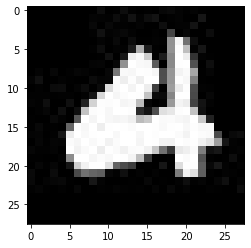

In [90]:
# test get BGR888 data
image, label = get_data('training_1.h5', 'train', 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print('Label: {}'.format(label))

### Practice: 請使用get_data函式取得training_2.h5資料集裡面train的第30個圖檔以及標記


[{"id": 44, "image_id": 44, "category_id": 6, "category_name": "6", "category": "6"}]
Label: 6


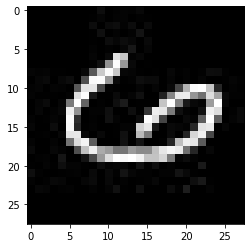

In [91]:
### Hint: index起始為0，第10個圖檔輸入的index為9
### 開始編寫
image, label = get_data('training_2.h5', 'train', 29)
### 結束編寫
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print('Label: {}'.format(label))

##  1.3 - 上傳 Dataset

Cambrain Dataset SDK的 **add()** 方法可將 **jupyter環境** 的.hdf5或是.h5檔案上傳至 **"工作空間"** 的 **"資料集"**  。

```python
def add(filename, token, name, visible, meta)
    ''' add a dataset to Cambrian Dataset
    Args:
        filename:string, jupyter環境的h5檔案名稱
        token:string, jupyter環境的專案token
        name:string, 資料集列表顯示的dataset名稱
        visible:string, dataset在資料集是否公開
        meta:dict. f['meta-dataset'][0]的資訊，輸入格式為dictionary
    Returns:
        result:dict
    '''
```

### Practice: 實作upload_dataset函式
```python
def upload_dataset(filename, token, name, visible, meta)
    ''' upload dataset to cambrian platform
    Args
        filename: jupyter環境的h5檔案名稱，輸入格式為string
        token: jupyter環境的專案token，輸入格式為string
        name: 工作空間資料集的dataset名稱，輸入格式為string
        visible: 工作空間資料集的dataset是否可被其他人瀏覽，輸入格式為string，'public'為公開，'private'為非公開
        meta: f['meta-dataset'][0]的資訊，輸入格式為dictionary
    Return
        token: upload dataset token
    '''
```

In [92]:
def upload_dataset(filename, token, name, visible, meta):
    ''' upload dataset to cambrian platform
    Args
        filename: jupyter環境的h5檔案名稱，輸入格式為string
        token: jupyter環境的專案token，輸入格式為string
        name: 工作空間資料集的dataset名稱，輸入格式為string
        visible: 工作空間資料集的dataset是否可被其他人瀏覽，輸入格式為string，'public'為公開，'private'為非公開
        meta: f['meta-dataset'][0]的資訊，輸入格式為dictionary
    Return
        token: upload dataset token
    '''    
    ds = Dataset(verbose = None)

    ### Hint:使用 Dataset SDK的add()函式
    ### 開始編寫
    ret = ds.add(filename, token, name, visible, meta)
    ### 結束編寫
    if ret is None:
        print("add {} error.".format(file_obj))
        sys.exit(1)
        
    dataset_token = ret.get('datasetToken', None)
    print("Add dataset success, dataset_token({})".format(dataset_token))
    return dataset_token

### 測試upload_dataset上傳資料集到cambrian平台
creator : 使用者名稱<br>
project_token : 目前工作空間的project token，可以在Jupyter main page看到，如下圖
<img src="md_image/dataset_sdk/project_token.png" style="float:left">

In [93]:
filename = "training_1.h5" # source file
name = "upload_by_sdk" # upload name
visible = 'private'
token = os.getenv('PROJECT_TOKEN', None)
assert token != None, 'Fail to get PROJECT_TOKEN from environment variable'

### 開始編寫
creator = "Johnny Kuo"
### 結束編寫

hdf5_file = h5py.File(filename,'r')
meta = json.loads(hdf5_file['meta-dataset'][0])
misc = {"job_id": 0, "job_name": "", "creator": creator, "resize": "none"}
meta['misc'] = misc

# upload dataset to cambrian
token = upload_dataset(filename, token, name, visible, meta)

print('upload token: {}'.format(token))

2021-05-19 05:24:26,533 - cambrian.dataset/INFO - Use meta:{"general": {"spec_version": "2021.04.21", "image_count": {"train": 30, "validate": 0, "test": 0}, "labeled_image_count": 30, "unlabeled_image_count": 0, "image_dataset_format": "BGR888", "description": "", "application_type": "", "data_created": "2021-05-04T18:23:04.766092", "project_token": "112e8d07f967c25fb5c0e294307158f6", "data_type": [], "module_name": [], "name": "training_1", "consensus": {}}, "location": {"bu": [], "campus": [], "plant": [], "line": [], "station": []}, "image": {"color_type": "BGR888", "image_resolution": {"28x28": 30}}, "manufacturing": {"product_name": [], "product_sku": [], "part_id": [], "sub_part_id": [], "part_number": []}, "label": {"categories": [{"id": 1, "name": "1", "supercategory": ""}, {"id": 2, "name": "2", "supercategory": ""}, {"id": 3, "name": "3", "supercategory": ""}, {"id": 4, "name": "4", "supercategory": ""}, {"id": 5, "name": "5", "supercategory": ""}, {"id": 6, "name": "6", "su

Add dataset success, dataset_token(f5a4620241c3238e15c903a6a2c3b8a1)
upload token: f5a4620241c3238e15c903a6a2c3b8a1


### 預期結果
如下圖的結果，但token會是另外一組
<br><img src="md_image/dataset_sdk/upload_dataset_success.png" width="600" height="300" style="float:left">

## Assignment Finished
### Congratulations!! Remember to upload your assignment snapshot to moodle